In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [31]:
cd /content/gdrive/My\ Drive/SetareToranj

/content/gdrive/My Drive/SetareToranj


In [0]:
df = pd.read_excel('digi_clean_final.xlsx')

In [33]:
df.head()

,Unnamed: 0,product_title,title_en,likes,dislikes,recommend,title,comment,advantages,disadvantages,comment_len,word_count,catg_likes,catg_dislikes
0,1,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,AC,4,1,2,واقعا عالیه,سلام قبل اینکه نظرم رو بگم میخواستم موضوع مهم ...,عمر طولانی افت بسیار کم میزان شارژ امپر خروجی ...,داشت#دار,770,144,-75,-75
1,2,یدک پولیشر میکروفایبر مهسان مدل 20119,HW,1,0,0,خیلی سخت حوله اش میاد,گیره های فلزی خیلی سخت میشوند لذا حوله خیلی سخ...,فیلد خالی,فیلد خالی,228,46,-75,-75
2,3,گوشی موبایل هوآوی آنر مدل 5X KIW-L21 دو سیم‌کارت,MO,6,11,1,گوشی مقرون صرفه,چیز رابطه ظاهر گوشی بسیار خوب است بدنه یکپارچه...,صفحه نمایش پرنور کیفیت کیفیت بالای ساخت باتری ...,کیفیت پایین اسپیکر حاشیه خالی زیر صفحه نمایش ع...,1018,181,-75,-75
3,4,شارژر همراه شیائومی مدل Mi ظرفیت 5000 میلی آمپ...,AC,19,4,1,ابعاد استحکام نگهداری شارژ مناسب,ظرفیتش براتون کافیه حتما بخرید یه شارژر ۵ ولت ...,ظریف زیبا باریک بدنه محکم دوام,ظرفیت متوسط,292,57,-75,-75
4,5,لپ تاپ 15 اینچی ایسوس مدل N501VW - A,IT,6,1,2,اقرار بیش حد ایراد گرفتن,سلام دوستان منم مثه بعضی دوستان قبل خرید کلی ت...,همه چیز تو مشخصات اومده بجز ۳ کوچیک,تاچ پدش میتونست بهتر باشه سرعت پاسخ گویی حس کی...,990,195,-75,-75


In [0]:
df = df.drop(columns=['Unnamed: 0'])

In [35]:
df.head()

,product_title,title_en,likes,dislikes,recommend,title,comment,advantages,disadvantages,comment_len,word_count,catg_likes,catg_dislikes
0,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,AC,4,1,2,واقعا عالیه,سلام قبل اینکه نظرم رو بگم میخواستم موضوع مهم ...,عمر طولانی افت بسیار کم میزان شارژ امپر خروجی ...,داشت#دار,770,144,-75,-75
1,یدک پولیشر میکروفایبر مهسان مدل 20119,HW,1,0,0,خیلی سخت حوله اش میاد,گیره های فلزی خیلی سخت میشوند لذا حوله خیلی سخ...,فیلد خالی,فیلد خالی,228,46,-75,-75
2,گوشی موبایل هوآوی آنر مدل 5X KIW-L21 دو سیم‌کارت,MO,6,11,1,گوشی مقرون صرفه,چیز رابطه ظاهر گوشی بسیار خوب است بدنه یکپارچه...,صفحه نمایش پرنور کیفیت کیفیت بالای ساخت باتری ...,کیفیت پایین اسپیکر حاشیه خالی زیر صفحه نمایش ع...,1018,181,-75,-75
3,شارژر همراه شیائومی مدل Mi ظرفیت 5000 میلی آمپ...,AC,19,4,1,ابعاد استحکام نگهداری شارژ مناسب,ظرفیتش براتون کافیه حتما بخرید یه شارژر ۵ ولت ...,ظریف زیبا باریک بدنه محکم دوام,ظرفیت متوسط,292,57,-75,-75
4,لپ تاپ 15 اینچی ایسوس مدل N501VW - A,IT,6,1,2,اقرار بیش حد ایراد گرفتن,سلام دوستان منم مثه بعضی دوستان قبل خرید کلی ت...,همه چیز تو مشخصات اومده بجز ۳ کوچیک,تاچ پدش میتونست بهتر باشه سرعت پاسخ گویی حس کی...,990,195,-75,-75


In [0]:
from textblob import TextBlob

In [0]:
#get text length and word count
df['comment_len'] = df['comment'].astype(str).apply(len)
df['word_count'] = df['comment'].apply(lambda x: len(str(x).split()))

In [38]:
df.head()

,product_title,title_en,likes,dislikes,recommend,title,comment,advantages,disadvantages,comment_len,word_count,catg_likes,catg_dislikes
0,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,AC,4,1,2,واقعا عالیه,سلام قبل اینکه نظرم رو بگم میخواستم موضوع مهم ...,عمر طولانی افت بسیار کم میزان شارژ امپر خروجی ...,داشت#دار,770,144,-75,-75
1,یدک پولیشر میکروفایبر مهسان مدل 20119,HW,1,0,0,خیلی سخت حوله اش میاد,گیره های فلزی خیلی سخت میشوند لذا حوله خیلی سخ...,فیلد خالی,فیلد خالی,228,46,-75,-75
2,گوشی موبایل هوآوی آنر مدل 5X KIW-L21 دو سیم‌کارت,MO,6,11,1,گوشی مقرون صرفه,چیز رابطه ظاهر گوشی بسیار خوب است بدنه یکپارچه...,صفحه نمایش پرنور کیفیت کیفیت بالای ساخت باتری ...,کیفیت پایین اسپیکر حاشیه خالی زیر صفحه نمایش ع...,1018,181,-75,-75
3,شارژر همراه شیائومی مدل Mi ظرفیت 5000 میلی آمپ...,AC,19,4,1,ابعاد استحکام نگهداری شارژ مناسب,ظرفیتش براتون کافیه حتما بخرید یه شارژر ۵ ولت ...,ظریف زیبا باریک بدنه محکم دوام,ظرفیت متوسط,292,57,-75,-75
4,لپ تاپ 15 اینچی ایسوس مدل N501VW - A,IT,6,1,2,اقرار بیش حد ایراد گرفتن,سلام دوستان منم مثه بعضی دوستان قبل خرید کلی ت...,همه چیز تو مشخصات اومده بجز ۳ کوچیک,تاچ پدش میتونست بهتر باشه سرعت پاسخ گویی حس کی...,990,195,-75,-75


In [39]:
# number of comment with no likes and dislikes
df[(df['likes'] == 0) & (df['dislikes'] == 0)].count()

product_title    0
title_en         0
likes            0
dislikes         0
recommend        0
title            0
comment          0
advantages       0
disadvantages    0
comment_len      0
word_count       0
catg_likes       0
catg_dislikes    0
dtype: int64

In [0]:
df_nz = df.drop(df[(df['likes'] == 0) & (df['dislikes'] == 0)].index)

In [41]:
df_nz.head(40)

,product_title,title_en,likes,dislikes,recommend,title,comment,advantages,disadvantages,comment_len,word_count,catg_likes,catg_dislikes
0,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,AC,4,1,2,واقعا عالیه,سلام قبل اینکه نظرم رو بگم میخواستم موضوع مهم ...,عمر طولانی افت بسیار کم میزان شارژ امپر خروجی ...,داشت#دار,770,144,-75,-75
1,یدک پولیشر میکروفایبر مهسان مدل 20119,HW,1,0,0,خیلی سخت حوله اش میاد,گیره های فلزی خیلی سخت میشوند لذا حوله خیلی سخ...,فیلد خالی,فیلد خالی,228,46,-75,-75
2,گوشی موبایل هوآوی آنر مدل 5X KIW-L21 دو سیم‌کارت,MO,6,11,1,گوشی مقرون صرفه,چیز رابطه ظاهر گوشی بسیار خوب است بدنه یکپارچه...,صفحه نمایش پرنور کیفیت کیفیت بالای ساخت باتری ...,کیفیت پایین اسپیکر حاشیه خالی زیر صفحه نمایش ع...,1018,181,-75,-75
3,شارژر همراه شیائومی مدل Mi ظرفیت 5000 میلی آمپ...,AC,19,4,1,ابعاد استحکام نگهداری شارژ مناسب,ظرفیتش براتون کافیه حتما بخرید یه شارژر ۵ ولت ...,ظریف زیبا باریک بدنه محکم دوام,ظرفیت متوسط,292,57,-75,-75
4,لپ تاپ 15 اینچی ایسوس مدل N501VW - A,IT,6,1,2,اقرار بیش حد ایراد گرفتن,سلام دوستان منم مثه بعضی دوستان قبل خرید کلی ت...,همه چیز تو مشخصات اومده بجز ۳ کوچیک,تاچ پدش میتونست بهتر باشه سرعت پاسخ گویی حس کی...,990,195,-75,-75
5,اسپیکر بلوتوثی دیووم مدل Bluetune bean,IT,3,0,2,بسیار خوب,چند سالی هست اسپیکرو خریدم واقعا حرف نداره برن...,کیفیت ساخت بسیار خوب کیفیت صدا بسیار عالی باتر...,داشت#دار,147,29,-75,-75
6,ادو پرفیوم زنانه امپر مدل Chifon حجم 100 میلی ...,PC,2,2,1,عطر,بوی تند ولی خوشبو داره ماندگاریش خوبه چقدر میگ...,فیلد خالی,فیلد خالی,62,11,-75,-75
7,ماشین اصلاح صورت رمینگتون مدل MB4555,PA,2,1,1,عمر مفید کوتاه,متاسفانه عمر مفید ماشین کم هست بعد سال دیگه با...,فیلد خالی,طراحی ارگونومیک نیست حین اصلاح مو تیغه ها میمو...,148,29,-75,-75
8,فلاسک هنری مدل Virginia Special ظرفیت 1.9 لیتر,HW,1,0,1,خوب بودممنون,خوب بودممنون,فیلد خالی,فیلد خالی,12,2,-75,-75
9,هارددیسک اکسترنال سیگیت مدل Backup Plus Deskto...,IT,1,0,2,هارد کیفیت ظاهر شیک,نزدیک ساله هارد رو خریدم استفاده سنگینی ازش ند...,کیفیت ساخت خوب ظاهر ساده زیبا صدای کم حجم زیاد,عدم مقاومت برابر ضربه عدم سهولت جا جایی دلیل آ...,351,68,-75,-75


In [42]:
df_nz.describe()

,likes,dislikes,recommend,comment_len,word_count
count,73469.000000,73469.000000,73469.000000,73469.000000,73469.000000
mean,4.239598,2.245110,1.203419,125.309477,24.206958
std,9.134335,10.333697,0.696272,155.785497,29.872676
min,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,40.000000,8.000000
50%,2.000000,1.000000,1.000000,81.000000,16.000000
75%,5.000000,2.000000,2.000000,154.000000,30.000000
max,854.000000,1344.000000,2.000000,4889.000000,949.000000


In [43]:
df_nz[df_nz['likes'] >=2].count()

product_title    46981
title_en         46981
likes            46981
dislikes         46981
recommend        46981
title            46981
comment          46981
advantages       46981
disadvantages    46981
comment_len      46981
word_count       46981
catg_likes       46981
catg_dislikes    46981
dtype: int64

In [44]:
df_nz[df_nz['dislikes'] >=1].count()

product_title    42562
title_en         42562
likes            42562
dislikes         42562
recommend        42562
title            42562
comment          42562
advantages       42562
disadvantages    42562
comment_len      42562
word_count       42562
catg_likes       42562
catg_dislikes    42562
dtype: int64

In [45]:
df_nz.word_count.describe()

count    73469.000000
mean        24.206958
std         29.872676
min          0.000000
25%          8.000000
50%         16.000000
75%         30.000000
max        949.000000
Name: word_count, dtype: float64

In [46]:
df_nz.comment_len.describe()

count    73469.000000
mean       125.309477
std        155.785497
min          1.000000
25%         40.000000
50%         81.000000
75%        154.000000
max       4889.000000
Name: comment_len, dtype: float64

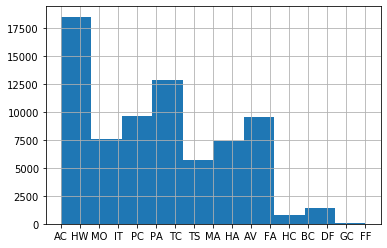

In [47]:
# Density Plot and Histogram of product title_en
df_nz.title_en.hist()

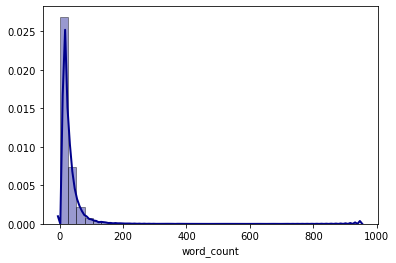

In [48]:
# Density Plot and Histogram of comment word count
sns.distplot(df_nz['word_count'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

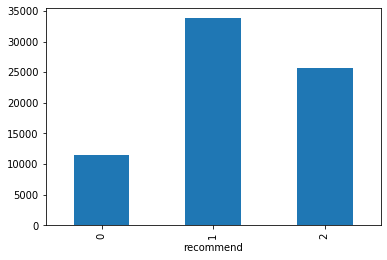

In [49]:
# GROUP UNIQUE COMMENTS BASED ON RECOMMEND STATUS
#recommend plot - 0: not recommend, 1: no idea , 2: recommend
df_nz.groupby('recommend')['comment'].nunique().plot(kind='bar')
plt.show()
######################################################################
# RESULT
#There are 15000 unique comments for products which are not recommended  
#There are about 50000 unique comments for products which are no idea
#There are 35000 unique comments for products which are recommended

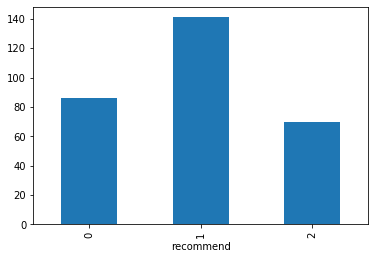

In [50]:
# GROUP UNIQUE LIKES BASED ON RECOMMEND STATUS
# 0: not recommend, 1: no idea , 2: recommend
df_nz.groupby('recommend')['likes'].nunique().plot(kind='bar')
plt.show()
######################################################################
# RESULT
#There are about 85 unique likes for products which are not recommended  
#There are 140 unique likes for products which are no idea
#There are about 70 unique likes for products which are not recommended

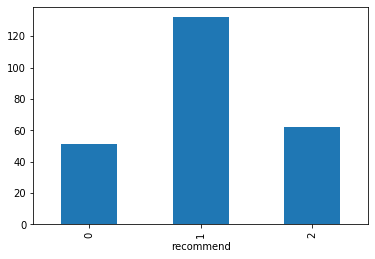

In [51]:
# GROUP UNIQUE DISLIKES BASED ON RECOMMEND STATUS
# 0: not recommend, 1: no idea , 2: recommend
df_nz.groupby('recommend')['dislikes'].nunique().plot(kind='bar')
plt.show()
######################################################################
# RESULT
#There are 50 unique dislikes for products which are not recommended  
#There are about 130 unique dislikes for products which are no idea
#There are 60 unique dislikes for products which are not recommended

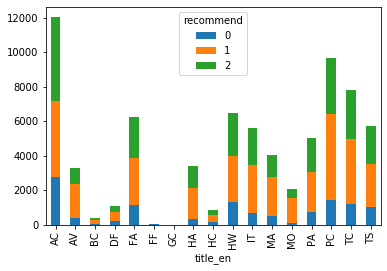

In [52]:
# GROUP COMMENTS BASED ON PRODUCT TITLE AND RECOMMEND STATUS
# 0: not recommend, 1: no idea , 2: recommend
df_nz.groupby(['title_en','recommend']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
######################################################################
# RESULT
#There are 2500 comments about AC Products which is not recommended, 4500 is no idea and 5500 is recommended
#There are 1000 comments about PC Products which is not recommended, 5500 is no idea and 3500 is recommended

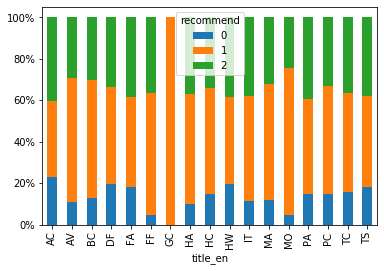

In [53]:
import matplotlib.ticker as mtick
# GROUP COMMENTS BASED ON PRODUCT TITLE AND RECOMMEND STATUS IN PERCENTAGE
# 0: not recommend, 1: no idea , 2: recommend
df_nz.groupby(['title_en','recommend']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()
######################################################################
# RESULT
#22% of comments about AC Products is not recommended, 40% is no idea and 40% is recommended
#5% of comments about FF Products is not recommended, 60% is no idea and3 35% is recommended

In [0]:
#Categorical likes and dislikes
def cat(x):
    if x <= 75:
        return "-75"
    if x > 150:
        return "+150"
    return "between"

In [0]:
df_nz['catg_likes'] = df_nz['likes'].apply(lambda x: cat(x))
df_nz['catg_dislikes'] = df_nz['dislikes'].apply(lambda x: cat(x))

In [0]:
lowlike = df_nz.likes[df_nz.likes <= 75].count()
highlike = df_nz.likes[df_nz.likes > 150].count()
midlike = df_nz.likes[(df_nz['likes'] > 75) & (df_nz['likes'] <= 150)].count()

In [57]:
print('number of comments under 75 likes: {} - number of comments more than 150 likes: {} - number of comments between 75 and 150 likes: {} ' .format(lowlike, highlike, midlike))

number of comments under 75 likes: 73343 - number of comments more than 150 likes: 24 - number of comments between 75 and 150 likes: 102 


In [0]:
lowdislike = df_nz.dislikes[df_nz.dislikes <= 75].count()
highdislike = df_nz.dislikes[df_nz.dislikes > 150].count()
middislike = df_nz.dislikes[(df_nz['dislikes'] > 75) & (df_nz['dislikes'] <= 150)].count()

In [59]:
print('number of comments under 75 dislikes: {} - number of comments more than 150 dislikes: {} - number of comments between 75 and 150 dislikes: {} ' .format(lowdislike, highdislike, middislike))

number of comments under 75 dislikes: 73379 - number of comments more than 150 dislikes: 31 - number of comments between 75 and 150 dislikes: 59 


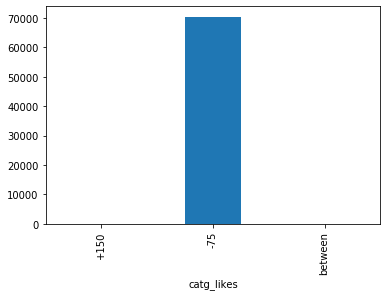

In [60]:
# GROUP UNIQUE COMMENTS BASED ON NUMBER OF Likes
df_nz.groupby('catg_likes')['comment'].nunique().plot(kind='bar')
plt.show()

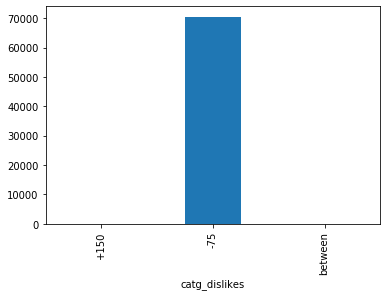

In [61]:
# GROUP UNIQUE COMMENTS BASED ON NUMBER OF DisLikes
df_nz.groupby('catg_dislikes')['comment'].nunique().plot(kind='bar')
plt.show()

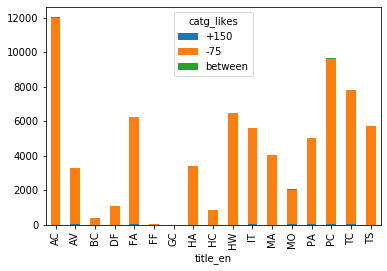

In [62]:
# GROUP COMMENTS BASED ON PRODUCT TITLE AND LIKES STATUS
df_nz.groupby(['title_en','catg_likes']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
######################################################################
# RESULT
#There is 12000 comments about AC Products with less than 75 likes 
# All the products mostly have likes less than 75 
# FF, GC and BC product titles have lowest likes (nearly with no likes)

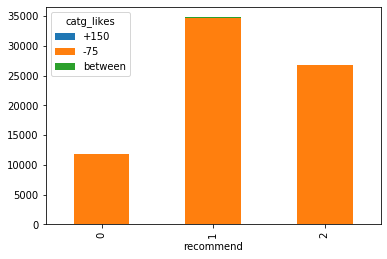

In [63]:
df_nz.groupby(['recommend','catg_likes']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
######################################################################
# RESULT
#no ides comment has most less likes 

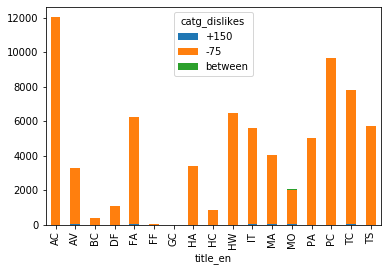

In [64]:
# GROUP COMMENTS BASED ON PRODUCT TITLE AND LIKES STATUS
df_nz.groupby(['title_en','catg_dislikes']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
######################################################################
#There is 12000 comments about AC Products with less than 75 dislikes 
# All the products mostly have dislikes less than 75 
# FF, GC and BC product titles have lowest dislikes (nearly with no dislikes)

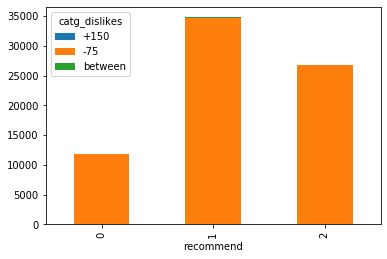

In [65]:
df_nz.groupby(['recommend','catg_dislikes']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
######################################################################
# RESULT
#Most of the dislikes are less than 75 

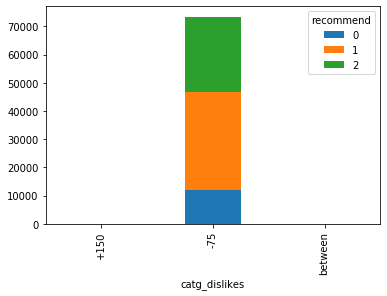

In [66]:
df_nz.groupby(['catg_dislikes','recommend']).size().unstack().plot(kind='bar',stacked=True)
plt.show()
######################################################################
# RESULT
#Most of the dislikes less than 75 are about no idea comment

In [0]:
#Get Most Frequent Words
from collections import Counter
freq = Counter(" ".join(df_nz["comment"]).split()).most_common(60)

In [0]:
n = 0 # N. . .
word_text = [x[n] for x in freq]

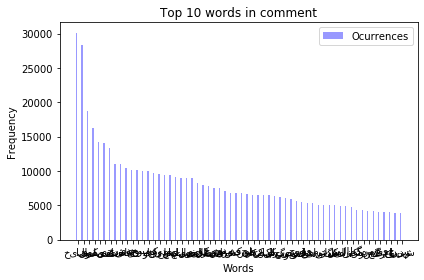

In [69]:
#Plot thr common words
data = freq

n_groups = len(data)

vals_films = [x[1] for x in data]
legends_films = [x[0] for x in data]

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, vals_films, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Ocurrences')


plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 words in comment')
plt.xticks(index + bar_width, legends_films)
plt.legend()

plt.tight_layout()
plt.show()

In [0]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from textblob import TextBlob
from textblob import Word

In [0]:
# Group Comments based on likes
df3 = df_nz.groupby('catg_likes').agg(lambda x: x.tolist())

In [0]:
# Group Comments based on dislikes
df4 = df_nz.groupby('catg_dislikes').agg(lambda x: x.tolist())

In [0]:
df_lowlike = df_nz[df_nz['catg_likes'] == '-75']

In [0]:
df_midlike = df_nz[df_nz['catg_likes'] == 'between']

In [0]:
df_highlike = df_nz[df_nz['catg_likes'] == '+150']

In [0]:
df_lowdislike = df_nz[df_nz['catg_dislikes'] == '-75']

In [0]:
df_middislike = df_nz[df_nz['catg_dislikes'] == '-75']

In [0]:
df_highdislike = df_nz[df_nz['catg_dislikes'] == '-75']

In [0]:
#Get Most Frequent Words in comment in low likes
freq = Counter(" ".join(df_lowlike["comment"]).split()).most_common(10)

In [80]:
freq

[('خیلی', 30054),
 ('رو', 28180),
 ('داره', 18700),
 ('ولی', 16224),
 ('استفاده', 14156),
 ('هست', 13938),
 ('کیفیت', 13236),
 ('میشه', 10999),
 ('خریدم', 10934),
 ('های', 10440)]

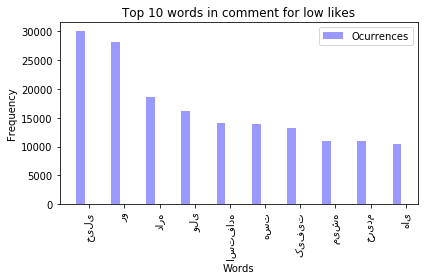

In [81]:
#Plot the common words
data = freq

n_groups = len(data)

vals_films = [x[1] for x in data]
legends_films = [x[0] for x in data]

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, vals_films, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Ocurrences')


plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 words in comment for low likes')
plt.xticks(index + bar_width, legends_films, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

In [82]:
#Get Most Frequent Words in comment in mid likes
freq2 = Counter(" ".join(df_midlike["comment"]).split()).most_common(10)
freq2

[('رو', 85),
 ('خیلی', 64),
 ('هست', 43),
 ('ولی', 40),
 ('های', 40),
 ('استفاده', 35),
 ('گوشی', 33),
 ('داره', 33),
 ('شارژ', 32),
 ('میشه', 31)]

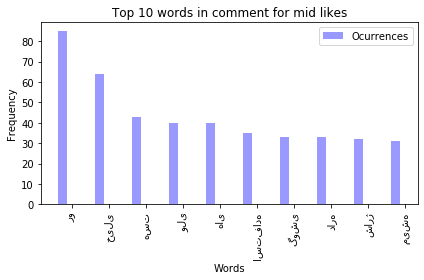

In [83]:
#Plot the common words
data = freq2

n_groups = len(data)

vals_films = [x[1] for x in data]
legends_films = [x[0] for x in data]

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, vals_films, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Ocurrences')


plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 words in comment for mid likes')
plt.xticks(index + bar_width, legends_films, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

In [84]:
#Get Most Frequent Words in comment in high likes
freq3 = Counter(" ".join(df_highlike["comment"]).split()).most_common(10)
freq3

[('رو', 54),
 ('کنید', 26),
 ('یه', 16),
 ('هست', 16),
 ('ایرباد', 15),
 ('داره', 14),
 ('میشه', 14),
 ('ها', 13),
 ('اگه', 12),
 ('گوشی', 11)]

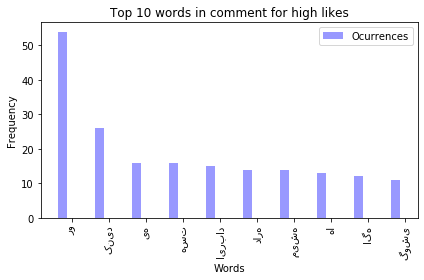

In [85]:
#Plot the common words
data = freq3

n_groups = len(data)

vals_films = [x[1] for x in data]
legends_films = [x[0] for x in data]

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, vals_films, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Ocurrences')


plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 words in comment for high likes')
plt.xticks(index + bar_width, legends_films, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

In [86]:
#Get Most Frequent Words in comment in low dislikes
freq4 = Counter(" ".join(df_lowdislike["comment"]).split()).most_common(10)
freq4

[('خیلی', 30089),
 ('رو', 28276),
 ('داره', 18728),
 ('ولی', 16253),
 ('استفاده', 14184),
 ('هست', 13983),
 ('کیفیت', 13250),
 ('میشه', 11035),
 ('خریدم', 10932),
 ('های', 10467)]

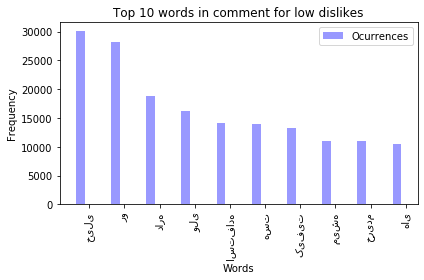

In [87]:
#Plot the common words
data = freq4

n_groups = len(data)

vals_films = [x[1] for x in data]
legends_films = [x[0] for x in data]

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, vals_films, bar_width,
                 alpha=opacity, 
                 color='b',
                 label='Ocurrences')


plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 words in comment for low dislikes')
plt.xticks(index + bar_width, legends_films, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

In [88]:
#Get Most Frequent Words in comment in mid dislikes
freq5 = Counter(" ".join(df_middislike["comment"]).split()).most_common(10)
freq5

[('خیلی', 30089),
 ('رو', 28276),
 ('داره', 18728),
 ('ولی', 16253),
 ('استفاده', 14184),
 ('هست', 13983),
 ('کیفیت', 13250),
 ('میشه', 11035),
 ('خریدم', 10932),
 ('های', 10467)]

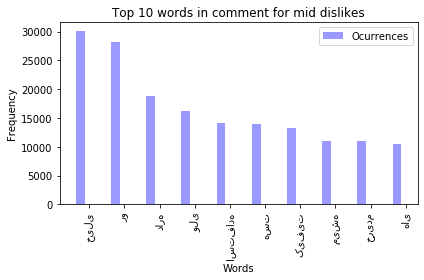

In [89]:
#Plot the common words
data = freq5

n_groups = len(data)

vals_films = [x[1] for x in data]
legends_films = [x[0] for x in data]

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, vals_films, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Ocurrences')


plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 words in comment for mid dislikes')
plt.xticks(index + bar_width, legends_films, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

In [90]:
#Get Most Frequent Words in comment in high dislikes
freq6 = Counter(" ".join(df_highdislike["comment"]).split()).most_common(10)
freq6

[('خیلی', 30089),
 ('رو', 28276),
 ('داره', 18728),
 ('ولی', 16253),
 ('استفاده', 14184),
 ('هست', 13983),
 ('کیفیت', 13250),
 ('میشه', 11035),
 ('خریدم', 10932),
 ('های', 10467)]

In [91]:
n = 0 # N. . .
[x[n] for x in freq6]

['خیلی',
 'رو',
 'داره',
 'ولی',
 'استفاده',
 'هست',
 'کیفیت',
 'میشه',
 'خریدم',
 'های']

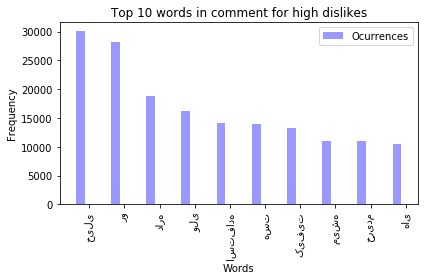

In [92]:
#Plot the common words
data = freq6

n_groups = len(data)

vals_films = [x[1] for x in data]
legends_films = [x[0] for x in data]

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.25

opacity = 0.4

rects1 = plt.bar(index, vals_films, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Ocurrences')


plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 words in comment for high dislikes')
plt.xticks(index + bar_width, legends_films, rotation=90)
plt.legend()

plt.tight_layout()
plt.show()

## Word Cloud

In [93]:
!pip install persian_wordcloud

In [0]:
from os import path
from persian_wordcloud.wordcloud import PersianWordCloud, add_stop_words
import matplotlib.image as mpimg

In [0]:
stopwords = []
file = open('stopwords-fa2.txt').read()
[stopwords.append(x) for x in file.split('\n')]
stopwords = set(stopwords)

###Show Most Frequent Words in Comments

In [0]:
with open("freq_words.txt", "w") as output:
   output.write(str(word_text))

In [0]:
text = open('freq_words.txt', encoding='utf-8').read()

In [0]:
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

In [0]:
image = wordcloud.to_image()
image.show()

In [0]:
image.save('wordcloud.png')

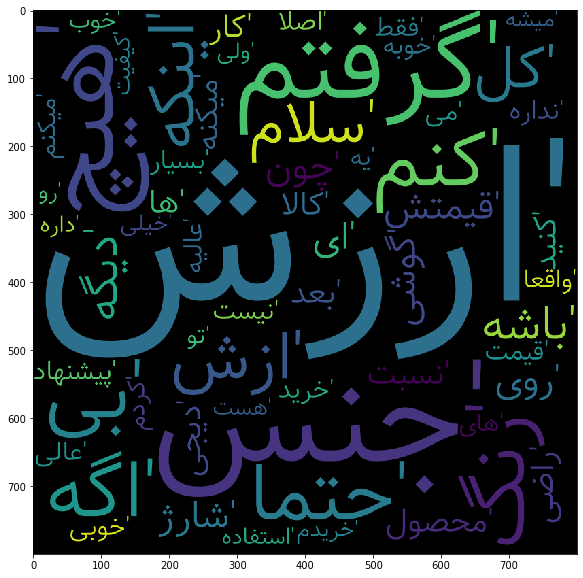

In [101]:
import matplotlib.image as mpimg
img=mpimg.imread('wordcloud.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

### Show Most Frequent Words as DISADVANTAGES in Highly Disliked Comments

In [0]:
#Get Most Frequent Words
from collections import Counter
freq7 = Counter(" ".join(df_highdislike["disadvantages"]).split()).most_common(30)

In [0]:
n = 0 # N. . .
negative_text = [x[n] for x in freq7]

In [0]:
with open("negative_words.txt", "w") as output:
    output.write(str(negative_text))

In [0]:
text = open('negative_words.txt', encoding='utf-8').read()
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

image = wordcloud.to_image()
image.show()

image.save('negative_wordcloud.png')

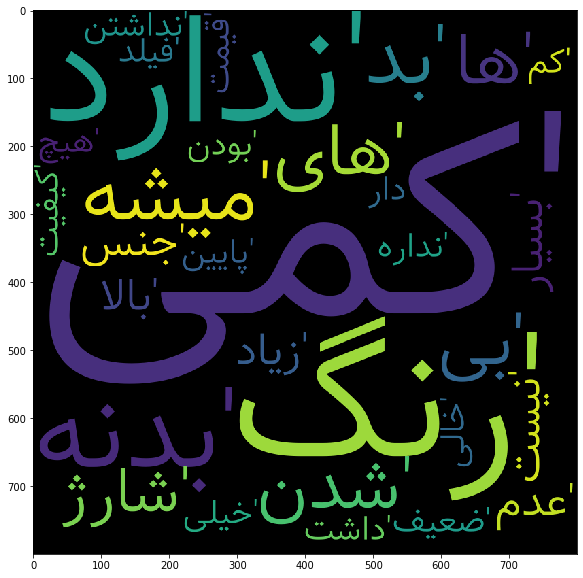

In [106]:
img=mpimg.imread('negative_wordcloud.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

##### Show Most Frequent Words as ADVANTAGES in Highly liked Comments

In [0]:
#Get Most Frequent Words
from collections import Counter
freq8 = Counter(" ".join(df_highlike["advantages"]).split()).most_common(30)

In [0]:
n = 0 # N. . .
positive_text = [x[n] for x in freq8]

In [0]:
with open("positive_words.txt", "w") as output:
    output.write(str(positive_text))

In [0]:
text = open('positive_words.txt', encoding='utf-8').read()
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

image = wordcloud.to_image()
image.show()

image.save('positive_wordcloud.png')

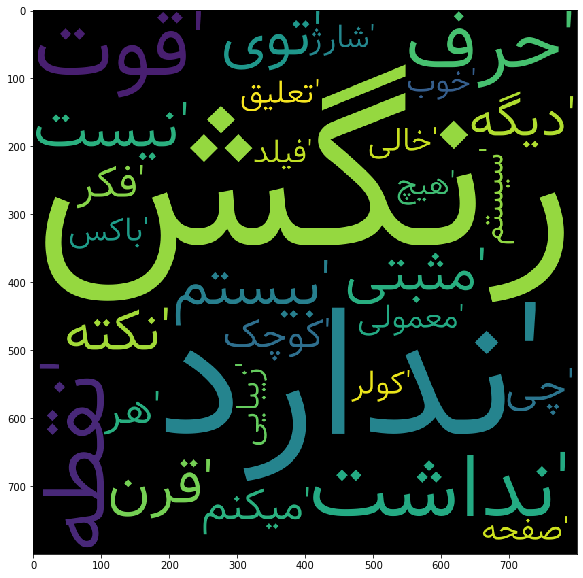

In [111]:
img=mpimg.imread('positive_wordcloud.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

### Word Cloud For AC Product with High Likes and Low Dislikes

In [0]:
df_positive_AC = df_nz[(df_nz['title_en'] == 'AC') & (df_nz['catg_likes'] == '+150') & (df_nz['catg_dislikes'] == '-75')]

In [113]:
df_positive_AC = df_nz[(df_nz['title_en'] == 'AC') & (df_nz['catg_likes'] == '+150') & (df_nz['catg_dislikes'] == '-75')]
# Handsfree Bluetooth
df_positive_AC.head(40)

,product_title,title_en,likes,dislikes,recommend,title,comment,advantages,disadvantages,comment_len,word_count,catg_likes,catg_dislikes
24764,هندزفری بلوتوث مدل i7S-TWS,AC,291,12,1,یه اشتباه قابل نگهداشتن {سلیقه ایی} لطفا بخونی...,نوشتن متن کوتاه بگذریم یه راست سر اصل مطلب شار...,باکس شارژ معمولی کوچک هر چی فکر میکنم دیگه نکت...,۲ساعت مد کاری استریو {دوتایی} ۴ ساعت دونه دونه...,2225,438,+150,-75


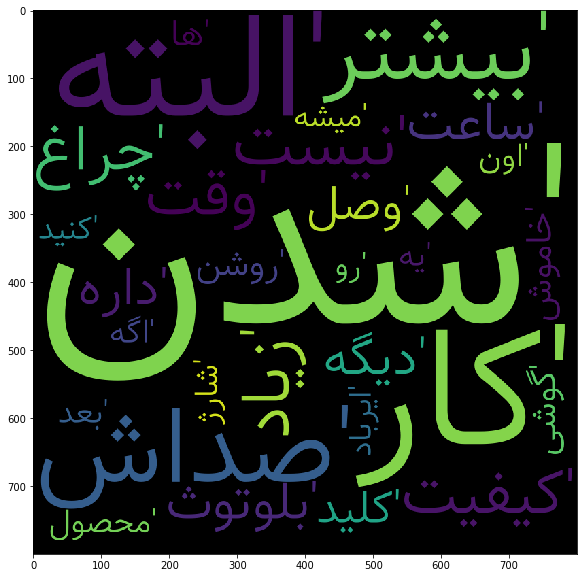

In [114]:
#Get Most Frequent Words 
from collections import Counter
ac_comm = Counter(" ".join(df_positive_AC["comment"]).split()).most_common(30)


n = 0 # N. . .
positive_ac1 = [x[n] for x in ac_comm]


with open("positive_ac1.txt", "w") as output:
    output.write(str(positive_ac1))



text = open('positive_ac1.txt', encoding='utf-8').read()
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

image = wordcloud.to_image()
image.show()

image.save('positive_ac1_wc.png')



img=mpimg.imread('positive_ac1_wc.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

In [0]:
n = 0 # N. . .
positive_ac1 = [x[n] for x in ac_comm]

In [0]:
with open("positive_ac1.txt", "w") as output:
    output.write(str(positive_ac1))

In [0]:
text = open('positive_ac1.txt', encoding='utf-8').read()
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

image = wordcloud.to_image()
image.show()

image.save('positive_ac1_wc.png')

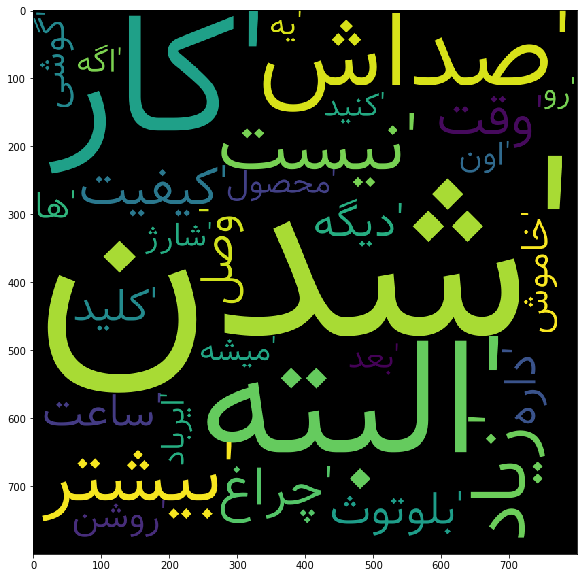

In [118]:
img=mpimg.imread('positive_ac1_wc.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

### Word Cloud For AC Product with LOw LIkes and Hight/Medium Dislikes

In [0]:
df_negative_AC = df_nz[(df_nz['title_en'] == 'AC') & (df_nz['catg_likes'] == '-75') & (df_nz['catg_dislikes'] == 'between')]

In [120]:
df_negative_AC.head()

,product_title,title_en,likes,dislikes,recommend,title,comment,advantages,disadvantages,comment_len,word_count,catg_likes,catg_dislikes
14851,اینورتر فنجانی انرجایزر مدل 180WATT,AC,6,124,1,عالیه,سلام تو شگفت انگیز خریدم امسال تو قطعی برق ها ...,فیلد خالی,فیلد خالی,93,19,-75,between
19455,شارژر همراه انکر مدل A1214 PowerCore ظرفیت 104...,AC,7,86,2,بی نقص,هیچ کس کالاهای دیجیتال سایت دیجی کالا نمی توان...,فیلد خالی,فیلد خالی,64,12,-75,between
60737,شارژر دیواری مک کوی مدل MC-CH01 به همراه 2 عدد...,AC,5,87,1,فعلا نمیتونم قطعی بدم,تازه خریدم فعلا نمیتونم قطعی بدم!,فیلد خالی,فیلد خالی,33,6,-75,between


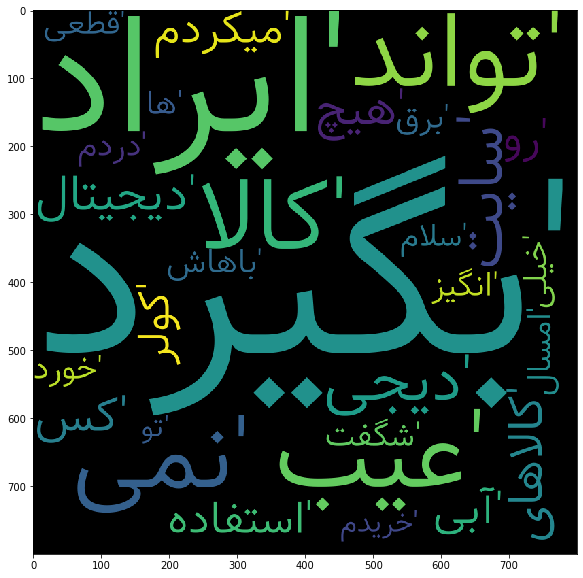

In [121]:
#Get Most Frequent Words for AC products in comments
from collections import Counter
ac_comm2 = Counter(" ".join(df_negative_AC["comment"]).split()).most_common(30)

n = 0 # N. . .
negative_ac1 = [x[n] for x in ac_comm2]

with open("negative_ac1.txt", "w") as output:
    output.write(str(negative_ac1))

text = open('negative_ac1.txt', encoding='utf-8').read()
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

image = wordcloud.to_image()
image.show()

image.save('negative_ac1_wc.png')

img=mpimg.imread('negative_ac1_wc.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

In [122]:
df_nz.title_en.unique()

array(['AC', 'HW', 'MO', 'IT', 'PC', 'PA', 'TC', 'TS', 'MA', 'HA', 'AV',
       'FA', 'HC', 'BC', 'DF', 'GC', 'FF'], dtype=object)

### Word Cloud For HW Product with Mid Likes and Low Dislikes

In [123]:
df_pos_HW = df_nz[(df_nz['title_en'] == 'HW') & (df_nz['catg_likes'] == 'between') & (df_nz['catg_dislikes'] == '-75')]
df_pos_HW.head()

,product_title,title_en,likes,dislikes,recommend,title,comment,advantages,disadvantages,comment_len,word_count,catg_likes,catg_dislikes
68103,لیوان گامین گلس مدل محک بسته 6 عددی,HW,143,2,0,انتقاداز کیفیت دیجی کالا,اکثر موارد خرید دیجی کالا وقتی فروشنده دیجی کا...,فیلد خالی,فیلد خالی,799,148,between,-75


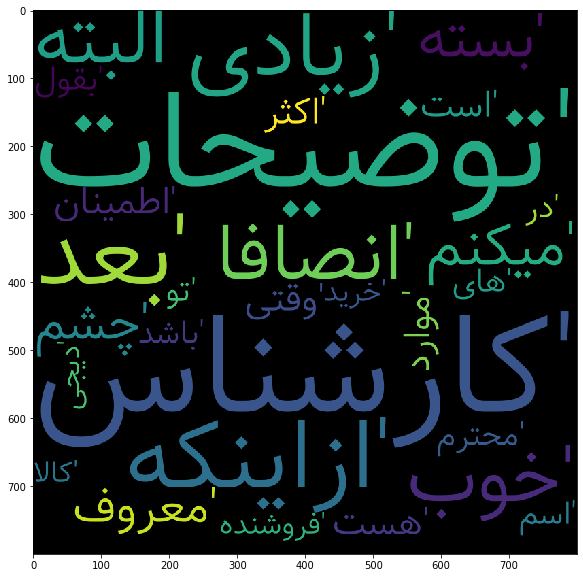

In [124]:
#Get Most Frequent Words for HW products in comments
from collections import Counter
hw_comm1 = Counter(" ".join(df_pos_HW["comment"]).split()).most_common(30)

n = 0 # N. . .
pos_hw = [x[n] for x in hw_comm1]

with open("pos_hw.txt", "w") as output:
    output.write(str(pos_hw))

text = open('pos_hw.txt', encoding='utf-8').read()
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

image = wordcloud.to_image()
image.show()

image.save('pos_hw_wc.png')

img=mpimg.imread('pos_hw_wc.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

### Word Cloud For HW Product with Low Likes and Mid Dislikes

In [125]:
df_neg_HW = df_nz[(df_nz['title_en'] == 'HW') & (df_nz['catg_likes'] == '-75') & (df_nz['catg_dislikes'] == 'between')]
df_neg_HW.head()

,product_title,title_en,likes,dislikes,recommend,title,comment,advantages,disadvantages,comment_len,word_count,catg_likes,catg_dislikes
26887,میز یوفیکس مدل لونا,HW,17,140,1,عالیه,عالیه حتما بخرید,محکم بودن,گران بودن,16,3,-75,between
38909,فندک زیپو مدل Chinese Dragon,HW,11,98,2,یه فندک فوق العاده,فندک خاص منحصر فرد فو ق العاده اس فندک صد صد ا...,روکش طلایی مغزی رنگ طلایی,فیلد خالی,111,25,-75,between
50202,میز یوفیکس مدل لونا,HW,5,87,1,فراتر میز عادی,میز دارا بودن سبک فرم منوفکچرال استفاده عناصر ...,فرم منوفکچرال عناصر,وزن زیاد (۱۱۳ کیلو),377,70,-75,between
51200,میز یوفیکس مدل لونا,HW,9,95,1,فوق العاده,میز چند جایزه مهم المللی دست آورده مثل جایزه ط...,همه چی تمام خاص,فیلد خالی,342,68,-75,between


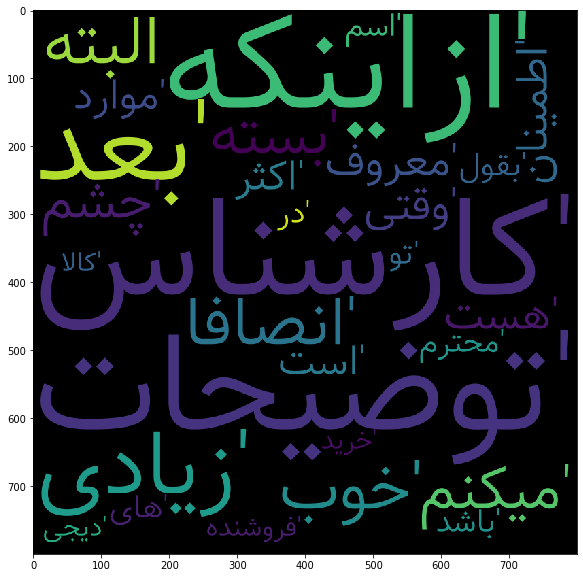

In [126]:
#Get Most Frequent Words for HW products in comments
from collections import Counter
hw_comm2 = Counter(" ".join(df_pos_HW["comment"]).split()).most_common(30)

n = 0 # N. . .
neg_hw = [x[n] for x in hw_comm2]

with open("neg_hw.txt", "w") as output:
    output.write(str(neg_hw))

text = open('neg_hw.txt', encoding='utf-8').read()
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

image = wordcloud.to_image()
image.show()

image.save('neg_hw_wc.png')

img=mpimg.imread('neg_hw_wc.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

In [0]:
df_nz.to_excel("digi_clean2.xlsx")

In [128]:
df_nz.product_title.unique()[0:20]

array(['شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 10000 میلی آمپر ساعت',
       'یدک پولیشر میکروفایبر مهسان مدل 20119',
       'گوشی موبایل هوآوی آنر مدل 5X KIW-L21 دو سیم\u200cکارت',
       'شارژر همراه شیائومی مدل Mi ظرفیت 5000 میلی آمپر ساعت',
       'لپ تاپ 15 اینچی ایسوس مدل N501VW - A',
       'اسپیکر بلوتوثی دیووم مدل Bluetune bean',
       'ادو پرفیوم زنانه امپر مدل Chifon حجم 100 میلی لیتر',
       'ماشین اصلاح صورت رمینگتون مدل MB4555',
       'فلاسک هنری مدل Virginia Special ظرفیت 1.9 لیتر',
       'هارددیسک اکسترنال سیگیت مدل Backup Plus Desktop ظرفیت 4 ترابایت',
       'شمع خودرو ان جی کی مدل BKR6EGP',
       'ماشین بازی بیبی لند مدل Top Car',
       'شارژر همراه لنوو با ظرفیت 10400 میلی آمپر ساعت',
       'خودتراش سیلور مدل M5 Magnum به همراه یک یدک',
       'فلاسک غذا خودرو بلک اند دکر مدل BDV212F',
       'کرم نرم کننده دست و صورت آلوئه ورا کاسه ای مای حجم 200 میلی لیتر',
       'ماساژور بیورر MG80', 'مچ\u200c بند هوشمند آی واون مدل i5 Plus',
       'ماشین اصلاح صورت پ

In [129]:
test = df_nz[df_nz['product_title'] == 'شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 10000 میلی آمپر ساعت']
test.head()

,product_title,title_en,likes,dislikes,recommend,title,comment,advantages,disadvantages,comment_len,word_count,catg_likes,catg_dislikes
0,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,AC,4,1,2,واقعا عالیه,سلام قبل اینکه نظرم رو بگم میخواستم موضوع مهم ...,عمر طولانی افت بسیار کم میزان شارژ امپر خروجی ...,داشت#دار,770,144,-75,-75
183,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,AC,7,1,2,کوچولو درد بخور,حدودا ۸ ساعت میذارم شارژ میشه ۲۵ بار گوشیمو شا...,کوچیک کم جا میگیره,۲ بار نیم شارژ می کنه,90,18,-75,-75
15351,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,AC,2,6,1,فیلد خالی,۱ بار بیشتر گوشی شارژ نمیکنه دارمش,بد بد بد,بدشمیزان شارژ دهی بد,34,7,-75,-75
32401,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,AC,3,2,2,دوام کاربردی,سال نیم پاوربانک استفاده میکنم کاملا دوام است ...,با دوام,فیلد خالی,104,20,-75,-75
56605,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,AC,5,3,1,کیفیت عالی,جنس بسیار خوب خوش دست کیفیت بالا,فیلد خالی,فیلد خالی,32,7,-75,-75


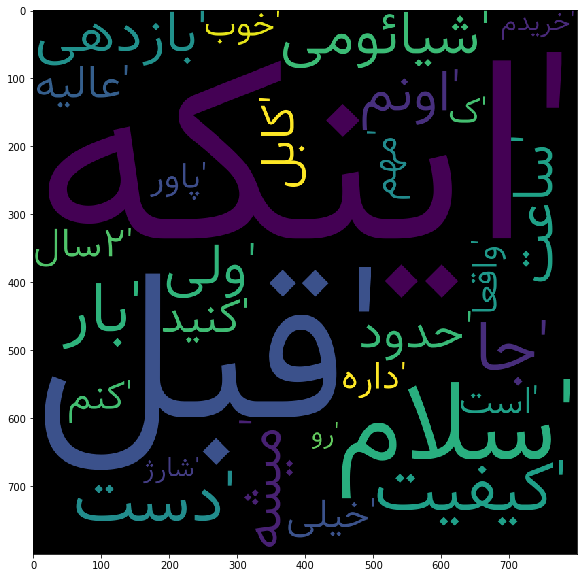

In [130]:
#Get Most Frequent Words for HW products in comments
from collections import Counter
test_comm2 = Counter(" ".join(test["comment"]).split()).most_common(30)

n = 0 # N. . .
test_list = [x[n] for x in test_comm2]

with open("test_list.txt", "w") as output:
    output.write(str(test_list))

text = open('test_list.txt', encoding='utf-8').read()
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

image = wordcloud.to_image()
image.show()

image.save('test_list_wc.png')

img=mpimg.imread('test_list_wc.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

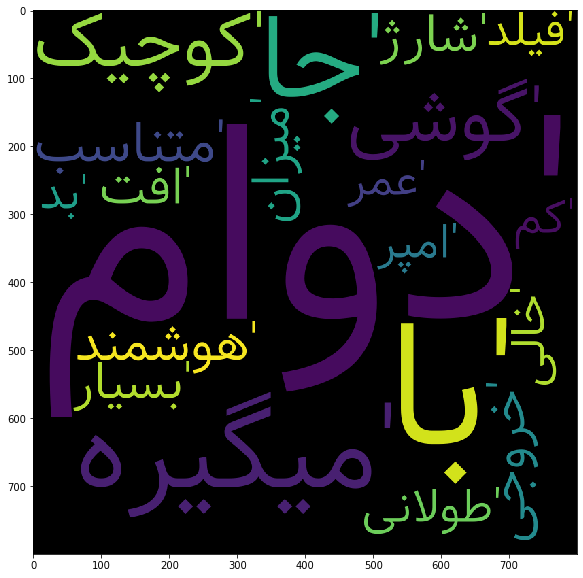

In [131]:
#Get Most Frequent Words for HW products in comments
from collections import Counter
test_comm3 = Counter(" ".join(test["advantages"]).split()).most_common(30)

n = 0 # N. . .
test_list2 = [x[n] for x in test_comm3]

with open("test_list2.txt", "w") as output:
    output.write(str(test_list2))

text = open('test_list2.txt', encoding='utf-8').read()
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

image = wordcloud.to_image()
image.show()

image.save('test_list2_wc.png')

img=mpimg.imread('test_list2_wc.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

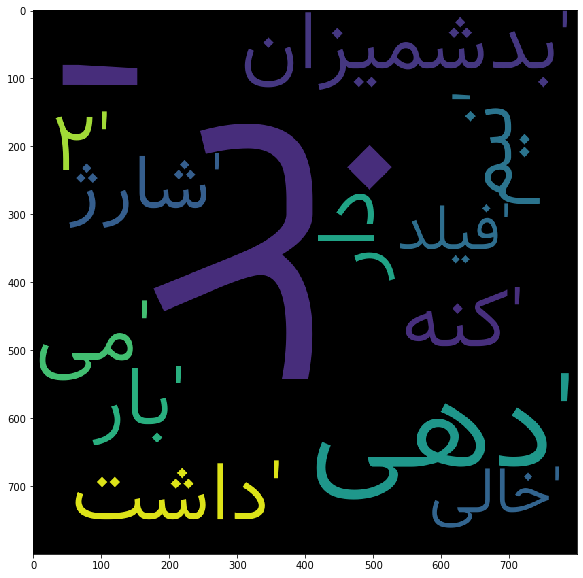

In [132]:
#Get Most Frequent Words for HW products in comments
from collections import Counter
test_comm4 = Counter(" ".join(test["disadvantages"]).split()).most_common(30)

n = 0 # N. . .
test_list3 = [x[n] for x in test_comm4]

with open("test_list3.txt", "w") as output:
    output.write(str(test_list3))

text = open('test_list3.txt', encoding='utf-8').read()
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

image = wordcloud.to_image()
image.show()

image.save('test_list3_wc.png')

img=mpimg.imread('test_list3_wc.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

#title_en :

# 1- IT

In [133]:
df.title_en.unique()


array(['AC', 'HW', 'MO', 'IT', 'PC', 'PA', 'TC', 'TS', 'MA', 'HA', 'AV',
       'FA', 'HC', 'BC', 'DF', 'GC', 'FF'], dtype=object)

In [134]:
df_positive_AC = df_nz[(df_nz['title_en'] == 'IT') & (df_nz['catg_likes'] == '+150') & (df_nz['catg_dislikes'] == '-75')]
# Handsfree Bluetooth
df_positive_AC.head(40)
print('dislikes: ', sum(df_positive_AC.dislikes))
print('likes: ', sum(df_positive_AC.dislikes))

dislikes:  56
likes:  56


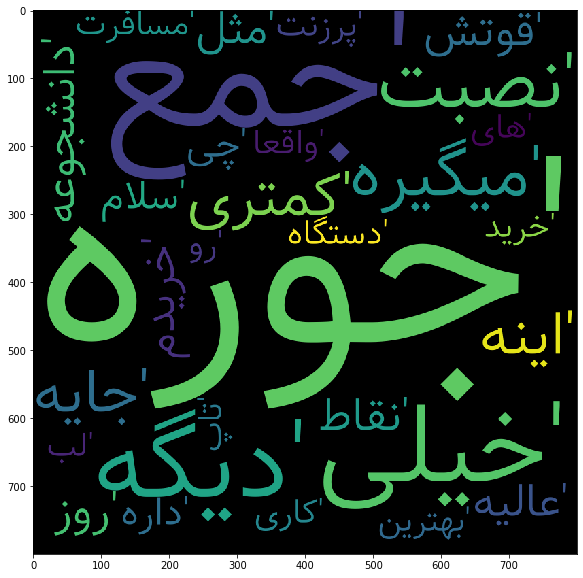

In [135]:
#Get Most Frequent Words for HW products in comments
from collections import Counter
hw_comm1 = Counter(" ".join(df_positive_AC["comment"]).split()).most_common(30)

n = 0 # N. . .
pos_hw = [x[n] for x in hw_comm1]

with open("pos_hw.txt", "w") as output:
    output.write(str(pos_hw))

text = open('pos_hw.txt', encoding='utf-8').read()
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

image = wordcloud.to_image()
image.show()

image.save('IT_comment.png')

img=mpimg.imread('IT_comment.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

#2- AC

In [136]:
df_positive_AC = df_nz[(df_nz['title_en'] == 'AC') & (df_nz['catg_likes'] == '+150') & (df_nz['catg_dislikes'] == '-75')]
# Handsfree Bluetooth
df_positive_AC.head(40)
print('dislikes: ', sum(df_positive_AC.dislikes))
print('likes: ', sum(df_positive_AC.dislikes))

dislikes:  12
likes:  12


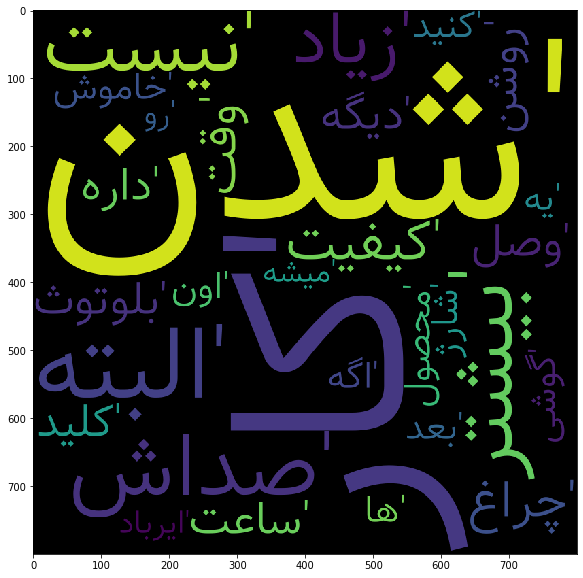

In [137]:
#Get Most Frequent Words for HW products in comments
from collections import Counter
hw_comm1 = Counter(" ".join(df_positive_AC["comment"]).split()).most_common(30)

n = 0 # N. . .
pos_hw = [x[n] for x in hw_comm1]

with open("pos_hw.txt", "w") as output:
    output.write(str(pos_hw))

text = open('pos_hw.txt', encoding='utf-8').read()
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

image = wordcloud.to_image()
image.show()

image.save('AC_comment.png')

img=mpimg.imread('AC_comment.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

#3- HW

In [140]:
df_positive_AC = df_nz[(df_nz['title_en'] == 'HW') & (df_nz['catg_likes'] == '+150') & (df_nz['catg_dislikes'] == '-75')]
# Handsfree Bluetooth
df_positive_AC.head(40)

print('dislikes: ', sum(df_positive_AC.dislikes))
print('likes: ', sum(df_positive_AC.dislikes))
###################################################


#Get Most Frequent Words for HW products in comments
from collections import Counter
hw_comm1 = Counter(" ".join(df_positive_AC["comment"]).split()).most_common(30)

n = 0 # N. . .
pos_hw = [x[n] for x in hw_comm1]

with open("pos_hw.txt", "w") as output:
    output.write(str(pos_hw))

text = open('pos_hw.txt', encoding='utf-8').read()
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

image = wordcloud.to_image()
image.show()

image.save('HW_comment.png')

img=mpimg.imread('HW_comment.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

dislikes:  0
likes:  0


ValueError: ignored

#4- MO

dislikes:  102
likes:  102


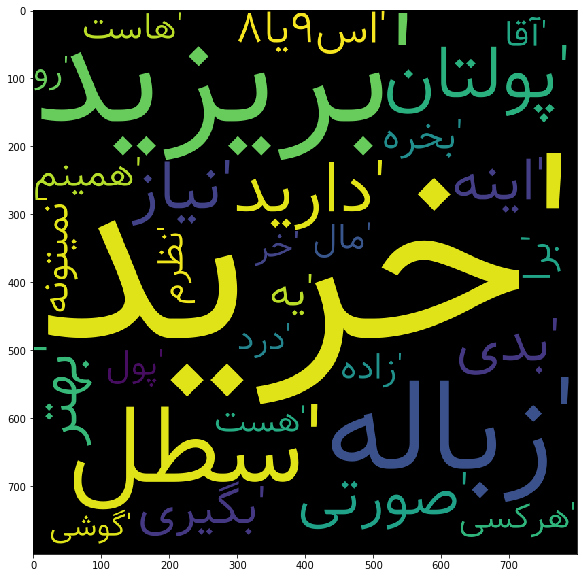

In [141]:
df_positive_AC = df_nz[(df_nz['title_en'] == 'MO') & (df_nz['catg_likes'] == '+150') & (df_nz['catg_dislikes'] == '-75')]
# Handsfree Bluetooth
df_positive_AC.head(40)
print('dislikes: ', sum(df_positive_AC.dislikes))
print('likes: ', sum(df_positive_AC.dislikes))
###################################################

#Get Most Frequent Words for HW products in comments
from collections import Counter
hw_comm1 = Counter(" ".join(df_positive_AC["comment"]).split()).most_common(30)

n = 0 # N. . .
pos_hw = [x[n] for x in hw_comm1]

with open("pos_hw.txt", "w") as output:
    output.write(str(pos_hw))

text = open('pos_hw.txt', encoding='utf-8').read()
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

image = wordcloud.to_image()
image.show()

image.save('MO_comment.png')

img=mpimg.imread('MO_comment.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

#5-  PC

dislikes:  39
likes:  39


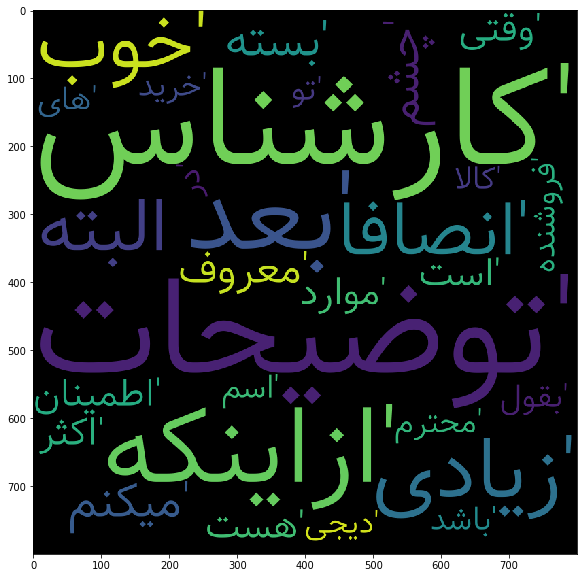

In [142]:
df_positive_AC = df_nz[(df_nz['title_en'] == 'PC') & (df_nz['catg_likes'] == '+150') & (df_nz['catg_dislikes'] == '-75')]
# Handsfree Bluetooth
df_positive_AC.head(40)
print('dislikes: ', sum(df_positive_AC.dislikes))
print('likes: ', sum(df_positive_AC.dislikes))
###################################################

#Get Most Frequent Words for HW products in comments
from collections import Counter
hw_comm1 = Counter(" ".join(df_pos_HW["comment"]).split()).most_common(30)

n = 0 # N. . .
pos_hw = [x[n] for x in hw_comm1]

with open("pos_hw.txt", "w") as output:
    output.write(str(pos_hw))

text = open('pos_hw.txt', encoding='utf-8').read()
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

image = wordcloud.to_image()
image.show()

image.save('PC_comment.png')

img=mpimg.imread('PC_comment.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

#6-  PA

dislikes:  10
likes:  10


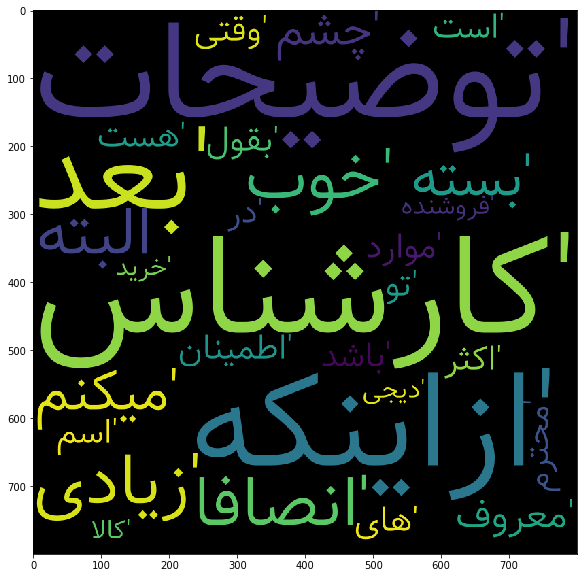

In [143]:
df_positive_AC = df_nz[(df_nz['title_en'] == 'PA') & (df_nz['catg_likes'] == '+150') & (df_nz['catg_dislikes'] == '-75')]
# Handsfree Bluetooth
df_positive_AC.head(40)
print('dislikes: ', sum(df_positive_AC.dislikes))
print('likes: ', sum(df_positive_AC.dislikes))
###################################################

#Get Most Frequent Words for HW products in comments
from collections import Counter
hw_comm1 = Counter(" ".join(df_pos_HW["comment"]).split()).most_common(30)

n = 0 # N. . .
pos_hw = [x[n] for x in hw_comm1]

with open("pos_hw.txt", "w") as output:
    output.write(str(pos_hw))

text = open('pos_hw.txt', encoding='utf-8').read()
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

image = wordcloud.to_image()
image.show()

image.save('PA_comment.png')

img=mpimg.imread('PA_comment.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

#7-  TS

In [144]:
df_positive_AC = df_nz[(df_nz['title_en'] == 'TS') & (df_nz['catg_likes'] == '+150') & (df_nz['catg_dislikes'] == '-75')]
# Handsfree Bluetooth
df_positive_AC.head(40)
print('dislikes: ', sum(df_positive_AC.dislikes))
print('likes: ', sum(df_positive_AC.dislikes))
###################################################

#Get Most Frequent Words for HW products in comments
from collections import Counter
hw_comm1 = Counter(" ".join(df_positive_AC["comment"]).split()).most_common(30)

n = 0 # N. . .
pos_hw = [x[n] for x in hw_comm1]

with open("pos_hw.txt", "w") as output:
    output.write(str(pos_hw))

text = open('pos_hw.txt', encoding='utf-8').read()
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

image = wordcloud.to_image()
image.show()

image.save('TS_comment.png')

img=mpimg.imread('TS_comment.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

dislikes:  0
likes:  0


ValueError: ignored

#8- TS

In [145]:
print(df.title_en.unique())


['AC' 'HW' 'MO' 'IT' 'PC' 'PA' 'TC' 'TS' 'MA' 'HA' 'AV' 'FA' 'HC' 'BC'
 'DF' 'GC' 'FF']


In [146]:
df_positive_AC = df_nz[(df_nz['title_en'] == 'TS') & (df_nz['catg_likes'] == '+150') & (df_nz['catg_dislikes'] == '-75')]
# Handsfree Bluetooth
df_positive_AC.head(40)
print('dislikes: ', sum(df_positive_AC.dislikes))
print('likes: ', sum(df_positive_AC.dislikes))
###################################################

#Get Most Frequent Words for HW products in comments
from collections import Counter
hw_comm1 = Counter(" ".join(df_positive_AC["comment"]).split()).most_common(30)

n = 0 # N. . .
pos_hw = [x[n] for x in hw_comm1]

with open("pos_hw.txt", "w") as output:
    output.write(str(pos_hw))

text = open('pos_hw.txt', encoding='utf-8').read()
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

image = wordcloud.to_image()
image.show()

image.save('TS_comment.png')

img=mpimg.imread('TS_comment.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

dislikes:  0
likes:  0


ValueError: ignored

#9- MA

dislikes:  19
likes:  19


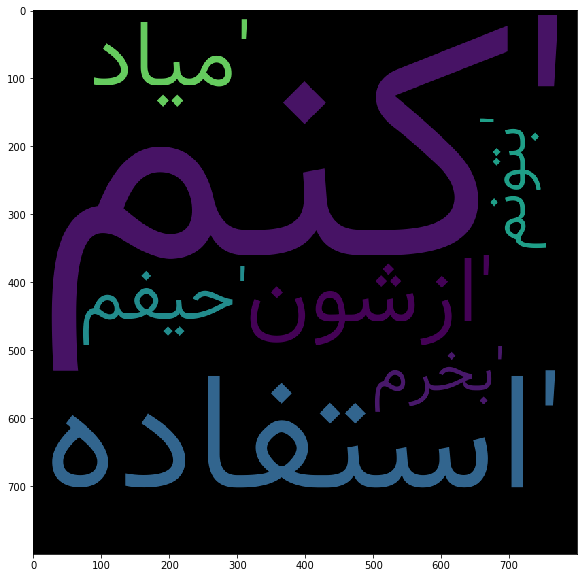

In [147]:


df_positive_AC = df_nz[(df_nz['title_en'] == 'MA') & (df_nz['catg_likes'] == '+150') & (df_nz['catg_dislikes'] == '-75')]
# Handsfree Bluetooth
df_positive_AC.head(40)
print('dislikes: ', sum(df_positive_AC.dislikes))
print('likes: ', sum(df_positive_AC.dislikes))
###################################################

#Get Most Frequent Words for HW products in comments
from collections import Counter
hw_comm1 = Counter(" ".join(df_positive_AC["comment"]).split()).most_common(30)

n = 0 # N. . .
pos_hw = [x[n] for x in hw_comm1]

with open("pos_hw.txt", "w") as output:
    output.write(str(pos_hw))

text = open('pos_hw.txt', encoding='utf-8').read()
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

image = wordcloud.to_image()
image.show()

image.save('MA_comment.png')

img=mpimg.imread('MA_comment.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

# 10- HA

In [148]:


df_positive_AC = df_nz[(df_nz['title_en'] == 'HA') & (df_nz['catg_likes'] == '+150') & (df_nz['catg_dislikes'] == '-75')]
# Handsfree Bluetooth
df_positive_AC.head(40)
print('dislikes: ', sum(df_positive_AC.dislikes))
print('likes: ', sum(df_positive_AC.dislikes))
###################################################

#Get Most Frequent Words for HW products in comments
from collections import Counter
hw_comm1 = Counter(" ".join(df_positive_AC["comment"]).split()).most_common(30)

n = 0 # N. . .
pos_hw = [x[n] for x in hw_comm1]

with open("pos_hw.txt", "w") as output:
    output.write(str(pos_hw))

text = open('pos_hw.txt', encoding='utf-8').read()
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

image = wordcloud.to_image()
image.show()

image.save('HA_comment.png')

img=mpimg.imread('HA_comment.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

dislikes:  0
likes:  0


ValueError: ignored

# 11- AV

dislikes:  46
likes:  46


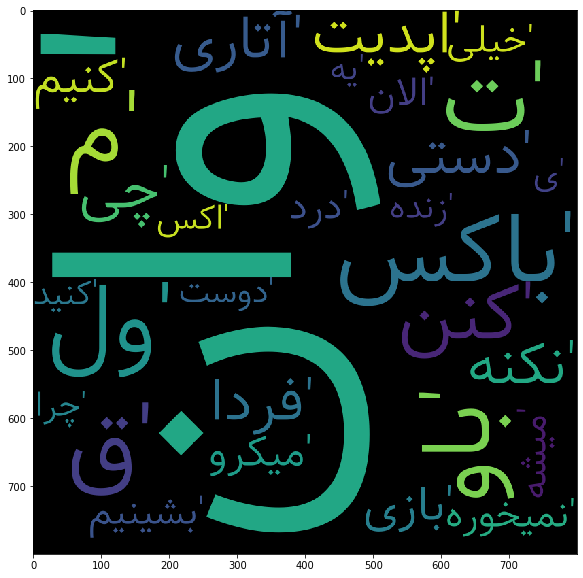

In [149]:


df_positive_AC = df_nz[(df_nz['title_en'] == 'AV') & (df_nz['catg_likes'] == '+150') & (df_nz['catg_dislikes'] == '-75')]
# Handsfree Bluetooth
df_positive_AC.head(40)
print('dislikes: ', sum(df_positive_AC.dislikes))
print('likes: ', sum(df_positive_AC.dislikes))
###################################################

#Get Most Frequent Words for HW products in comments
from collections import Counter
hw_comm1 = Counter(" ".join(df_positive_AC["comment"]).split()).most_common(30)

n = 0 # N. . .
pos_hw = [x[n] for x in hw_comm1]

with open("pos_hw.txt", "w") as output:
    output.write(str(pos_hw))

text = open('pos_hw.txt', encoding='utf-8').read()
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

image = wordcloud.to_image()
image.show()

image.save('AV_comment.png')

img=mpimg.imread('AV_comment.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

# 12- FA

dislikes:  29
likes:  29


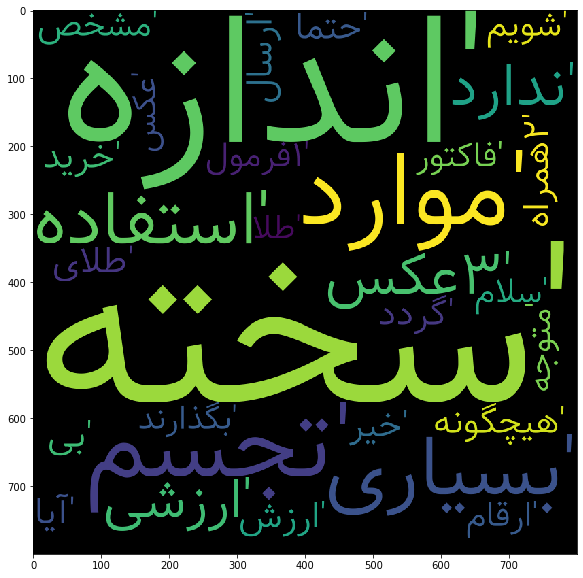

In [150]:


df_positive_AC = df_nz[(df_nz['title_en'] == 'FA') & (df_nz['catg_likes'] == '+150') & (df_nz['catg_dislikes'] == '-75')]
# Handsfree Bluetooth
df_positive_AC.head(40)
print('dislikes: ', sum(df_positive_AC.dislikes))
print('likes: ', sum(df_positive_AC.dislikes))
###################################################

#Get Most Frequent Words for HW products in comments
from collections import Counter
hw_comm1 = Counter(" ".join(df_positive_AC["comment"]).split()).most_common(30)

n = 0 # N. . .
pos_hw = [x[n] for x in hw_comm1]

with open("pos_hw.txt", "w") as output:
    output.write(str(pos_hw))

text = open('pos_hw.txt', encoding='utf-8').read()
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

image = wordcloud.to_image()
image.show()

image.save('FA_comment.png')

img=mpimg.imread('FA_comment.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

#13 - HC

In [151]:


df_positive_AC = df_nz[(df_nz['title_en'] == 'HC') & (df_nz['catg_likes'] == '+150') & (df_nz['catg_dislikes'] == '-75')]
# Handsfree Bluetooth
df_positive_AC.head(40)
print('dislikes: ', sum(df_positive_AC.dislikes))
print('likes: ', sum(df_positive_AC.dislikes))
###################################################

#Get Most Frequent Words for HW products in comments
from collections import Counter
hw_comm1 = Counter(" ".join(df_positive_AC["comment"]).split()).most_common(30)

n = 0 # N. . .
pos_hw = [x[n] for x in hw_comm1]

with open("pos_hw.txt", "w") as output:
    output.write(str(pos_hw))

text = open('pos_hw.txt', encoding='utf-8').read()
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

image = wordcloud.to_image()
image.show()

image.save('HC_comment.png')

img=mpimg.imread('HC_comment.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

dislikes:  0
likes:  0


ValueError: ignored

# 14- BC

In [152]:


df_positive_AC = df_nz[(df_nz['title_en'] == 'BC') & (df_nz['catg_likes'] == '+150') & (df_nz['catg_dislikes'] == '-75')]
# Handsfree Bluetooth
df_positive_AC.head(40)
print('dislikes: ', sum(df_positive_AC.dislikes))
print('likes: ', sum(df_positive_AC.dislikes))
###################################################

#Get Most Frequent Words for HW products in comments
from collections import Counter
hw_comm1 = Counter(" ".join(df_positive_AC["comment"]).split()).most_common(30)

n = 0 # N. . .
pos_hw = [x[n] for x in hw_comm1]

with open("pos_hw.txt", "w") as output:
    output.write(str(pos_hw))

text = open('pos_hw.txt', encoding='utf-8').read()
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

image = wordcloud.to_image()
image.show()

image.save('BC_comment.png')

img=mpimg.imread('BC_comment.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

dislikes:  0
likes:  0


ValueError: ignored

#15 - DF

In [153]:


df_positive_AC = df_nz[(df_nz['title_en'] == 'BC') & (df_nz['catg_likes'] == '+150') & (df_nz['catg_dislikes'] == '-75')]
# Handsfree Bluetooth
df_positive_AC.head(40)
print('dislikes: ', sum(df_positive_AC.dislikes))
print('likes: ', sum(df_positive_AC.dislikes))
###################################################

#Get Most Frequent Words for HW products in comments
from collections import Counter
hw_comm1 = Counter(" ".join(df_positive_AC["comment"]).split()).most_common(30)

n = 0 # N. . .
pos_hw = [x[n] for x in hw_comm1]

with open("pos_hw.txt", "w") as output:
    output.write(str(pos_hw))

text = open('pos_hw.txt', encoding='utf-8').read()
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

image = wordcloud.to_image()
image.show()

image.save('DF_comment.png')

img=mpimg.imread('DF_comment.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

dislikes:  0
likes:  0


ValueError: ignored

#16- GC

In [154]:


df_positive_AC = df_nz[(df_nz['title_en'] == 'BC') & (df_nz['catg_likes'] == '+150') & (df_nz['catg_dislikes'] == '-75')]
# Handsfree Bluetooth
df_positive_AC.head(40)
print('dislikes: ', sum(df_positive_AC.dislikes))
print('likes: ', sum(df_positive_AC.dislikes))
###################################################

#Get Most Frequent Words for HW products in comments
from collections import Counter
hw_comm1 = Counter(" ".join(df_positive_AC["comment"]).split()).most_common(30)

n = 0 # N. . .
pos_hw = [x[n] for x in hw_comm1]

with open("pos_hw.txt", "w") as output:
    output.write(str(pos_hw))

text = open('pos_hw.txt', encoding='utf-8').read()
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

image = wordcloud.to_image()
image.show()

image.save('GC_comment.png')

img=mpimg.imread('GC_comment.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

dislikes:  0
likes:  0


ValueError: ignored

# 17 - GF

In [155]:


df_positive_AC = df_nz[(df_nz['title_en'] == 'BC') & (df_nz['catg_likes'] == '+150') & (df_nz['catg_dislikes'] == '-75')]
# Handsfree Bluetooth
df_positive_AC.head(40)
print('dislikes: ', sum(df_positive_AC.dislikes))
print('likes: ', sum(df_positive_AC.dislikes))
###################################################

#Get Most Frequent Words for HW products in comments
from collections import Counter
hw_comm1 = Counter(" ".join(df_positive_AC["comment"]).split()).most_common(30)

n = 0 # N. . .
pos_hw = [x[n] for x in hw_comm1]

with open("pos_hw.txt", "w") as output:
    output.write(str(pos_hw))

text = open('pos_hw.txt', encoding='utf-8').read()
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

image = wordcloud.to_image()
image.show()

image.save('GF_comment.png')

img=mpimg.imread('GF_comment.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

dislikes:  0
likes:  0


ValueError: ignored

# 18- FF

In [156]:


df_positive_AC = df_nz[(df_nz['title_en'] == 'BC') & (df_nz['catg_likes'] == '+150') & (df_nz['catg_dislikes'] == '-75')]
# Handsfree Bluetooth
df_positive_AC.head(40)
print('dislikes: ', sum(df_positive_AC.dislikes))
print('likes: ', sum(df_positive_AC.dislikes))
###################################################

#Get Most Frequent Words for HW products in comments
from collections import Counter
hw_comm1 = Counter(" ".join(df_positive_AC["comment"]).split()).most_common(30)

n = 0 # N. . .
pos_hw = [x[n] for x in hw_comm1]

with open("pos_hw.txt", "w") as output:
    output.write(str(pos_hw))

text = open('pos_hw.txt', encoding='utf-8').read()
wordcloud = PersianWordCloud(only_persian=True,
max_words=100,
stopwords=stopwords,
margin=0,
width=800,
height=800,
    min_font_size=1,
    max_font_size=500,
    background_color="black"
).generate(text)

image = wordcloud.to_image()
image.show()

image.save('FF_comment.png')

img=mpimg.imread('FF_comment.png')
plt.figure(figsize = (10,10))
imgplot = plt.imshow(img)
plt.show()

dislikes:  0
likes:  0


ValueError: ignored